<a href="https://colab.research.google.com/github/humantsattabhayya/Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [1]:
#Load all the required packages
import pandas as pd
import numpy as np
import datetime
import math
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

##**IMPORTING DATASET:**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#file path
file='/content/drive/MyDrive/Alma better/Data/Copy of Online Retail.xlsx'
#reading excel file
dfRetail = pd.read_excel(file)
##dataset top 5 rows
dfRetail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##**ANALYZING DATASET:**

In [4]:
#data set lowes 5 rows
dfRetail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [5]:
#getting shape of dataset
dfRetail.shape

(541909, 8)

In [6]:
#getting information
dfRetail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
#getting column names
dfRetail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
#shifting columns
dfRetail = dfRetail[['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice']]

In [9]:
dfRetail.head()#getting head

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


##**PREPROCESSING:**

In [10]:
# Copy the Dataframe in case we mess up something
df = dfRetail.copy()

In [ ]:
#getting count,mean, min,max std etc
df.describe()

In [12]:
# Stats from Data Frame in case od Object Datatype
df.describe(include=['O'])

,InvoiceNo,StockCode,Country,Description
count,541909,541909,541909,540455
unique,25900,4070,38,4223
top,573585,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,1114,2313,495478,2369


##**HANDELING NULL VALUES:**

In [14]:
# Drop Duplicated rows of data from the DataFrame, It happened because of Human Error..!! :-p
print("*"*75)
print("Length of DataFrame with duplicate values : ", len(df))
df.drop_duplicates(inplace=True, keep='first')
print("*"*75)
print("Length of DataFrame after dropping all the duplicate values : ", len(df))
print("*"*75)

***************************************************************************
Length of DataFrame with duplicate values :  536641
***************************************************************************
Length of DataFrame after dropping all the duplicate values :  536641
***************************************************************************


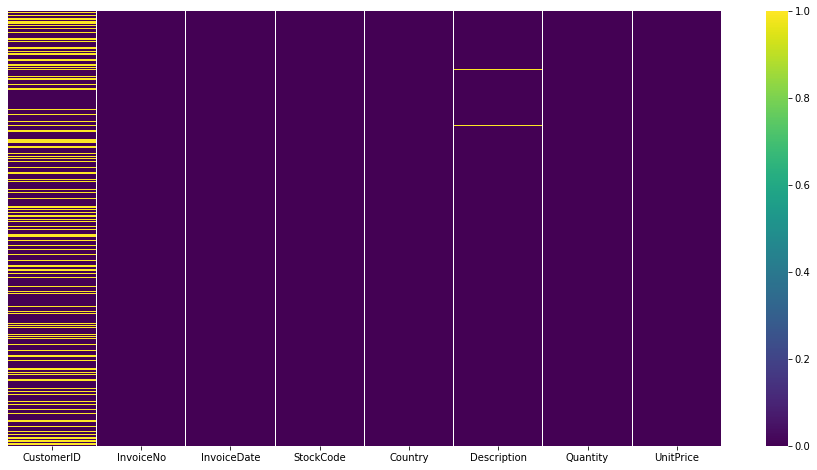

In [15]:
#plotting graph
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

In [16]:
# Creating a Definition for checking missing values.
def mdF():
    total_no = df.isnull().sum()
    missing_percentage = (df.isnull().sum()/len(df))*100
    mdF = pd.concat([total_no, missing_percentage], keys=['Missing_Values', 'Missing_Percentage'], axis=1)
    return mdF[mdF['Missing_Values'] > 1]

In [17]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,135037,25.163377
Description,1454,0.270945


In [18]:
# Drop the entries where both the CustomerID and Description are null values.
df.drop(index=df[df['CustomerID'].isna() & df['Description'].isna()].index, inplace=True)

In [19]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850.0,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850.0,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850.0,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850.0,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850.0,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [22]:
#getting columns
df.columns

Index(['CustomerID', 'InvoiceNo', 'InvoiceDate', 'StockCode', 'Country',
       'Description', 'Quantity', 'UnitPrice'],
      dtype='object')

In [23]:
mdF()

,Missing_Values,Missing_Percentage
CustomerID,133583,24.960061


In [24]:
# The Major Concept is to identify the Customer Categories, situation cannot proceed further with Missing Customer ID's
# Drop the null values in customer ID field
df.dropna(inplace=True)

In [25]:
#getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   CustomerID   401604 non-null  float64       
 1   InvoiceNo    401604 non-null  object        
 2   InvoiceDate  401604 non-null  datetime64[ns]
 3   StockCode    401604 non-null  object        
 4   Country      401604 non-null  object        
 5   Description  401604 non-null  object        
 6   Quantity     401604 non-null  int64         
 7   UnitPrice    401604 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [26]:
#describing
df.describe()


,CustomerID,Quantity,UnitPrice
count,401604.000000,401604.000000,401604.000000
mean,15281.160818,12.183273,3.474064
std,1714.006089,250.283037,69.764035
min,12346.000000,-80995.000000,0.000000
25%,13939.000000,2.000000,1.250000
50%,15145.000000,5.000000,1.950000
75%,16784.000000,12.000000,3.750000
max,18287.000000,80995.000000,38970.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


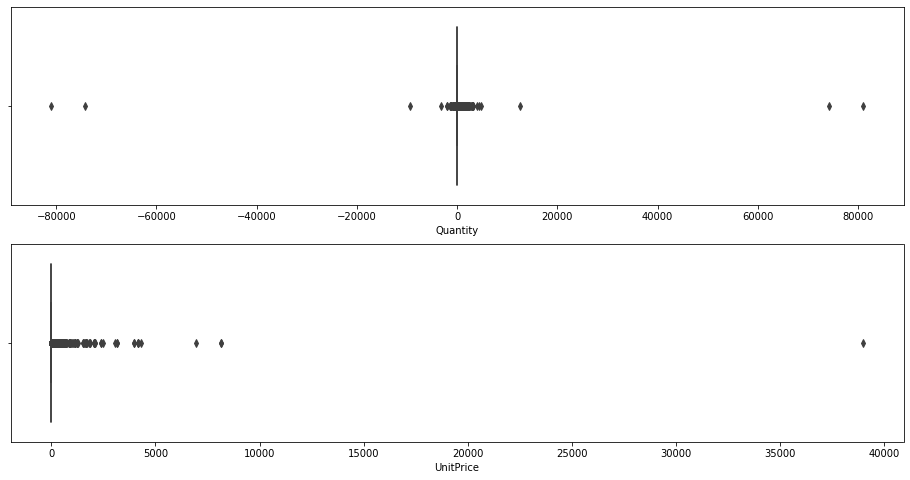

In [27]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [28]:
# Quantity & Unit Price should never be negative & not equals to Zero
# Grab the data frame where both the fields are positive in nature
df = df[df['Quantity'] > 0]
df = df[df['UnitPrice'] > 0]
print("Length of Dataframe is : ",len(df))

Length of Dataframe is :  392692


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


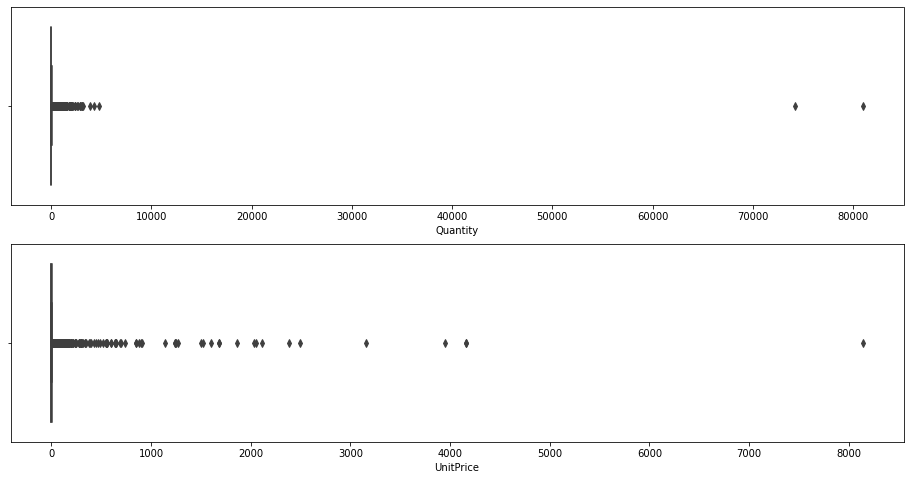

In [29]:
#plotting graph
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
sns.boxplot(df['Quantity'])
plt.subplot(2,1,2)
sns.boxplot(df['UnitPrice'])

In [30]:
df.describe()

,CustomerID,Quantity,UnitPrice
count,392692.000000,392692.000000,392692.000000
mean,15287.843865,13.119702,3.125914
std,1713.539549,180.492832,22.241836
min,12346.000000,1.000000,0.001000
25%,13955.000000,2.000000,1.250000
50%,15150.000000,6.000000,1.950000
75%,16791.000000,12.000000,3.750000
max,18287.000000,80995.000000,8142.750000


In [31]:
# Convert the Data Type of CustomerID to Integer using Lambda Function
df['CustomerID'] = df['CustomerID'].apply(lambda x: int(x))

In [32]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39


In [33]:
# Draw a new column with the total price paid by the customer
df['Total_Price'] = df['Quantity']*df['UnitPrice']

In [34]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [35]:
# draw different stats from the time stamps
year = df['InvoiceDate'].apply(lambda x: x.year)
month = df['InvoiceDate'].apply(lambda x: x.month)
weekday = df['InvoiceDate'].apply(lambda x: x.weekday())
time_hr = df['InvoiceDate'].apply(lambda x: x.time().hour)
minutes_hr = df['InvoiceDate'].apply(lambda x: x.time().minute)

In [37]:
#getting length
len(year), len(month), len(weekday), len(time_hr), len(minutes_hr)

(392692, 392692, 392692, 392692, 392692)

In [36]:
#converting month no. to month name
monthDict={1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June',
           7:'July', 8:'August', 9:'September', 10:'October', 11:'November', 12:'December'}
month = month.map(monthDict)

In [38]:
#converting no. to week day
day = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
weekday = weekday.map(day)

In [39]:
#creating function to seperate morning afternoon and evening
def Period(x):
    if 6 <= x < 12:
        return 'Morning'
    elif 12 <= x < 16:
        return 'Afternoon'
    elif 16<= x <= 20:
        return 'Evening'

In [40]:
#converting to year month weekday and time
df['Year'] = year
df['Month'] = month
df['WeekDay'] = weekday
df['TimePeriod'] = time_hr
df['TimePeriod'] = df['TimePeriod'].apply(lambda x: Period(x))

In [41]:
df.head()

,CustomerID,InvoiceNo,InvoiceDate,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,2010-12-01 08:26:00,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,2010-12-01 08:26:00,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,2010-12-01 08:26:00,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,2010-12-01 08:26:00,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,2010-12-01 08:26:00,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [42]:
#droping column
df.drop(labels='InvoiceDate', axis=1, inplace=True)

In [43]:
#getting head
df.head()

,CustomerID,InvoiceNo,StockCode,Country,Description,Quantity,UnitPrice,Total_Price,Year,Month,WeekDay,TimePeriod
0,17850,536365,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010,December,Wednesday,Morning
1,17850,536365,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34,2010,December,Wednesday,Morning
2,17850,536365,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010,December,Wednesday,Morning
3,17850,536365,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010,December,Wednesday,Morning
4,17850,536365,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010,December,Wednesday,Morning


In [44]:
#getting columns
df.columns

Index(['CustomerID', 'InvoiceNo', 'StockCode', 'Country', 'Description',
       'Quantity', 'UnitPrice', 'Total_Price', 'Year', 'Month', 'WeekDay',
       'TimePeriod'],
      dtype='object')

In [45]:
#shifting columns 
df = df[['CustomerID', 'InvoiceNo', 'Year', 'Month', 'WeekDay','TimePeriod',
         'StockCode', 'Country', 'Description', 'Quantity', 'UnitPrice', 'Total_Price']]

In [46]:
df.head()

,CustomerID,InvoiceNo,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [47]:
#copying df
customerDF = df.copy()

In [48]:
customerDF.head()#getting head

,CustomerID,InvoiceNo,Year,Month,WeekDay,TimePeriod,StockCode,Country,Description,Quantity,UnitPrice,Total_Price
0,17850,536365,2010,December,Wednesday,Morning,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30
1,17850,536365,2010,December,Wednesday,Morning,71053,United Kingdom,WHITE METAL LANTERN,6,3.39,20.34
2,17850,536365,2010,December,Wednesday,Morning,84406B,United Kingdom,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00
3,17850,536365,2010,December,Wednesday,Morning,84029G,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34
4,17850,536365,2010,December,Wednesday,Morning,84029E,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34


In [49]:
customerDF.info()#getting info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 541908
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   CustomerID   392692 non-null  int64  
 1   InvoiceNo    392692 non-null  object 
 2   Year         392692 non-null  int64  
 3   Month        392692 non-null  object 
 4   WeekDay      392692 non-null  object 
 5   TimePeriod   392692 non-null  object 
 6   StockCode    392692 non-null  object 
 7   Country      392692 non-null  object 
 8   Description  392692 non-null  object 
 9   Quantity     392692 non-null  int64  
 10  UnitPrice    392692 non-null  float64
 11  Total_Price  392692 non-null  float64
dtypes: float64(2), int64(3), object(7)
memory usage: 38.9+ MB


In [50]:
customerDF.describe()#describing

,CustomerID,Year,Quantity,UnitPrice,Total_Price
count,392692.000000,392692.000000,392692.000000,392692.000000,392692.000000
mean,15287.843865,2010.934631,13.119702,3.125914,22.631500
std,1713.539549,0.247177,180.492832,22.241836,311.099224
min,12346.000000,2010.000000,1.000000,0.001000,0.001000
25%,13955.000000,2011.000000,2.000000,1.250000,4.950000
50%,15150.000000,2011.000000,6.000000,1.950000,12.450000
75%,16791.000000,2011.000000,12.000000,3.750000,19.800000
max,18287.000000,2011.000000,80995.000000,8142.750000,168469.600000


In [51]:
customerDF.describe(include=['O'])#describing

,InvoiceNo,Month,WeekDay,TimePeriod,StockCode,Country,Description
count,392692,392692,392692,392692,392692,392692,392692
unique,18532,12,6,3,3665,37,3877
top,576339,November,Thursday,Afternoon,85123A,United Kingdom,WHITE HANGING HEART T-LIGHT HOLDER
freq,542,63168,79243,231998,2023,349203,2016
